In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.contingency import crosstab

In [75]:
def unreliable(x,codes=[8,32],tol=1):
    inds = []
    bools = np.zeros((x.shape[0],), dtype=int)
    for i in range(x.shape[0]):
        s=0
        for j in range(x.shape[1]):
            s+=int(np.any(x[i,j]==codes))
        if s/x.shape[1]>=tol:
            inds.append(i)
            bools[i]=1
    return np.array(inds), bools

def unreliable_count(x,codes=[8,32]):
    counts = np.zeros((x.shape[0],1), dtype=int)
    for i in range(x.shape[0]):
        s=0
        for j in range(x.shape[1]):
            s+=int(np.any(x[i,j]==codes))
        counts[i]=s
    return counts


def test_stat(x1,x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = np.std(x1,ddof=1)/np.sqrt(n1), np.std(x2,ddof=1)/np.sqrt(n2)
    m1, m2 = np.mean(x1), np.mean(x2)
    
    v1, v2 = n1-1, n2-1
    numer_v = (s1**2 + s2**2)**2
    denom_v = s1**4/v1 + s2**4/v2
    
    denom = np.sqrt(s1**2 + s2**2)
    return (m1-m2)/denom, numer_v/denom_v
    
    
def test_stat_ev(x1,x2):
    s = np.std(np.concatenate([unrel,null]),ddof=1)
    m1, m2 = np.mean(x1), np.mean(x2)
    
    denom = s*(1/len(x1) + 1/len(x2))
    return (m1-m2)/denom

def make_binTable(gap, code=[32], tol=1):
    _,result = unreliable(gap[:,:10],codes=code, tol=tol)
    result = result[:,np.newaxis]
    for i in range(1,4):
        _, tmp = unreliable(gap[:,i*10:(i+1)*10],codes=code, tol=tol)
        result = np.hstack((result, tmp[:,np.newaxis]))
    return result

def make_countTable(gap, code=[32], tol=1):
    result = unreliable_count(gap[:,:10],codes=code)
    for i in range(1,4):
        count = unreliable_count(gap[:,i*10:(i+1)*10],codes=code)
        result = np.hstack((result, count))
    return result


In [12]:
path = '../PDproj/celldata/datawithGFstatus/clean/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')]
filenames

['cellshilicnegGFstatus.csv',
 'cellshilicposGFstatus.csv',
 'cellslipidnegGFstatus.csv',
 'cellslipidposGFstatus.csv',
 'cellsRPnegGFstatus.csv',
 'cellsRPposGFstatus.csv',
 'mediumhilicnegGFstatus.csv',
 'mediumhilicposGFstatus.csv',
 'mediumRPnegGFstatus.csv',
 'mediumRPposGFstatus.csv']

In [61]:
filenum = 2
data = pd.read_csv(path + filenames[filenum],sep=';')
print(filenames[filenum])

cellslipidnegGFstatus.csv


In [169]:
filenum = 9
data = pd.read_csv(path + filenames[filenum],sep=';')
print(filenames[filenum])
tol=1

GAP = data.iloc[2:,88:128].to_numpy(dtype=int)
aSYN=data.iloc[2:,88:98].to_numpy(dtype=int)
comb=data.iloc[2:,98:108].to_numpy(dtype=int)
INFg=data.iloc[2:,108:118].to_numpy(dtype=int)
UT=data.iloc[2:,118:128].to_numpy(dtype=int)
aSYNinds, aSYNbool=unreliable(aSYN, tol=tol)
combinds, combbool=unreliable(comb, tol=tol)
INFginds, INFgbool=unreliable(INFg, tol=tol)
UTinds, UTbool=unreliable(UT, tol=tol)
ALLinds, ALLbool = unreliable(GAP, tol=tol)
N, n=GAP.flatten().shape[0], aSYN.flatten().shape[0]

mediumRPposGFstatus.csv


In [175]:
res=make_binTable(GAP,code=[32])
print('From {} rows'.format(GAP.shape[0]))
np.sum(res,axis=0)

From 859 rows


array([12, 15,  6,  0])

In [188]:
ind=np.where(np.sum(res, axis=1)==1)[0]
for i in ind:
    print("{}: {}".format(i,res[i,:]))

22: [0 1 0 0]
72: [1 0 0 0]
99: [0 1 0 0]
123: [1 0 0 0]
130: [0 1 0 0]
206: [1 0 0 0]
443: [1 0 0 0]
491: [1 0 0 0]
524: [0 1 0 0]
668: [1 0 0 0]


In [170]:
res=make_countTable(GAP,code=[32])
counts=res.flatten(order='F')[:,np.newaxis]
tmp=np.zeros((res.shape[0],1))
groups=np.vstack((tmp,1+tmp,2+tmp,3+tmp))

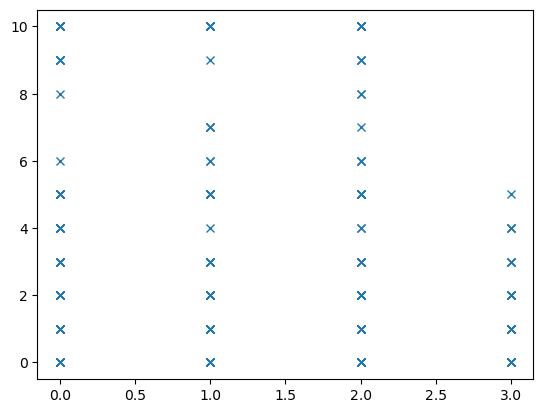

In [171]:
plt.plot(groups,counts,'x')

In [172]:
tab=crosstab(groups,counts)

In [173]:
tab

((array([0., 1., 2., 3.]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])),
 array([[775,  28,  12,   7,   7,  12,   1,   0,   1,   4,  12],
        [773,  33,  13,   5,   1,  13,   2,   3,   0,   1,  15],
        [791,  23,  13,   5,   2,  10,   3,   1,   2,   3,   6],
        [814,  32,   6,   3,   3,   1,   0,   0,   0,   0,   0]]))

In [79]:
for filenum in range(10):
    #filenum = 1
    data = pd.read_csv(path + filenames[filenum],sep=';')
    print('\n#####################################\n',filenames[filenum])
    tol=0.3
    GAP = data.iloc[2:,88:128].to_numpy(dtype=int)
    aSYN=data.iloc[2:,88:98].to_numpy(dtype=int)
    comb=data.iloc[2:,98:108].to_numpy(dtype=int)
    INFg=data.iloc[2:,108:118].to_numpy(dtype=int)
    UT=data.iloc[2:,118:128].to_numpy(dtype=int)
    aSYNinds, aSYNbool=unreliable(aSYN, tol=tol)
    combinds, combbool=unreliable(comb, tol=tol)
    INFginds, INFgbool=unreliable(INFg, tol=tol)
    UTinds, UTbool=unreliable(UT, tol=tol)
    ALLinds, ALLbool = unreliable(GAP, tol=tol)
    N, n=GAP.flatten().shape[0], aSYN.flatten().shape[0]
    gap= GAP.flatten()
    a=data.iloc[2:,8:48].to_numpy().flatten()

    print("\nNumber of Values: ",a.shape[0])
    print("GAP fill status!=0 in {} fields ({})".format(np.sum(GAP!=0),np.round((np.sum(GAP!=0))/N,3)))
    print("GAP fill status==0 in {} fields ({})".format(np.sum(GAP==0),np.round((np.sum(GAP==0))/N,3)))
    
    print("\nStatus 8")
    print("unreliably filled values in aSYN: {} ({})".format(np.sum(aSYN==8),np.round((np.sum(aSYN==8))/n,3)))
    print("unreliably filled values in comb: {} ({})".format(np.sum(comb==8),np.round((np.sum(comb==8))/n,3)))
    print("unreliably filled values in INFg: {} ({})".format(np.sum(INFg==8),np.round((np.sum(INFg==8))/n,3)))
    print("unreliably filled values in UT: {} ({})".format(np.sum(UT==8),np.round((np.sum(UT==8))/n,3)))
    print("unreliably filled values in ALL: {} ({})".format(np.sum(GAP==8),np.round((np.sum(GAP==8))/N,3)))
    
    print("\nStatus 32")
    print("unreliably filled values in aSYN: {} ({})".format(np.sum(aSYN==32),np.round((np.sum(aSYN==32))/n,3)))
    print("unreliably filled values in comb: {} ({})".format(np.sum(comb==32),np.round((np.sum(comb==32))/n,3)))
    print("unreliably filled values in INFg: {} ({})".format(np.sum(INFg==32),np.round((np.sum(INFg==32))/n,3)))
    print("unreliably filled values in UT: {} ({})".format(np.sum(UT==32),np.round((np.sum(UT==32))/n,3)))
    print("unreliably filled values in ALL: {} ({})".format(np.sum(GAP==32),np.round((np.sum(GAP==32))/N,3)))
    
    print("\nStatus 32 or 8")
    print("unreliably filled values in ALL: {}".format(np.round((np.sum(GAP==32) + np.sum(GAP==8))/N,3)))
    
    print("\nnumber of compounds with more than 2 unreliable values in aSYN: {} ({})".format(aSYNinds.shape[0],np.round(np.mean(aSYNbool),3)))
    print("number of compounds with more than 2 unreliable values in comb: {} ({})".format(combinds.shape[0],np.round(np.mean(combbool),3)))
    print("number of compounds with more than 2 unreliable values in INFg: {} ({})".format(INFginds.shape[0],np.round(np.mean(INFgbool),3)))
    print("number of compounds with more than 2 unreliable values in UT: {} ({})".format(UTinds.shape[0],np.round(np.mean(UTbool),3)))
    
    temp= np.unique(np.concatenate([np.where(gap==32)[0],np.where(gap==8)[0]]))
    ur=np.asarray(a[temp],dtype=float)
    r=np.asarray(a[[i for i in range(len(gap)) if i not in temp]],dtype=float)
    print("\nOver all reliable values, mean:",np.mean(r))
    print("Over all unreliable values (8 and 32), mean:",np.mean(ur))
    
    ur=np.asarray(a[np.unique(np.where(gap==8)[0])],dtype=float)
    print("Over all GAP 8 values, mean:",np.mean(ur))
    
    ur=np.asarray(a[np.unique(np.where(gap==32)[0])],dtype=float)
    print("Over all GAP 32 values, mean:",np.mean(ur))
    
    
    


#####################################
 cellshilicnegGFstatus.csv

Number of Values:  5240
GAP fill status!=0 in 2646 fields (0.505)
GAP fill status==0 in 2594 fields (0.495)

Status 8
unreliably filled values in aSYN: 24 (0.018)
unreliably filled values in comb: 24 (0.018)
unreliably filled values in INFg: 25 (0.019)
unreliably filled values in UT: 18 (0.014)
unreliably filled values in ALL: 91 (0.017)

Status 32
unreliably filled values in aSYN: 95 (0.073)
unreliably filled values in comb: 80 (0.061)
unreliably filled values in INFg: 67 (0.051)
unreliably filled values in UT: 90 (0.069)
unreliably filled values in ALL: 332 (0.063)

Status 32 or 8
unreliably filled values in ALL: 0.081

number of compounds with more than 2 unreliable values in aSYN: 20 (0.153)
number of compounds with more than 2 unreliable values in comb: 13 (0.099)
number of compounds with more than 2 unreliable values in INFg: 15 (0.115)
number of compounds with more than 2 unreliable values in UT: 19 (0.145)

Over


#####################################
 mediumhilicposGFstatus.csv

Number of Values:  17800
GAP fill status!=0 in 7970 fields (0.448)
GAP fill status==0 in 9830 fields (0.552)

Status 8
unreliably filled values in aSYN: 80 (0.018)
unreliably filled values in comb: 81 (0.018)
unreliably filled values in INFg: 101 (0.023)
unreliably filled values in UT: 90 (0.02)
unreliably filled values in ALL: 352 (0.02)

Status 32
unreliably filled values in aSYN: 248 (0.056)
unreliably filled values in comb: 278 (0.062)
unreliably filled values in INFg: 149 (0.033)
unreliably filled values in UT: 258 (0.058)
unreliably filled values in ALL: 933 (0.052)

Status 32 or 8
unreliably filled values in ALL: 0.072

number of compounds with more than 2 unreliable values in aSYN: 53 (0.119)
number of compounds with more than 2 unreliable values in comb: 56 (0.126)
number of compounds with more than 2 unreliable values in INFg: 42 (0.094)
number of compounds with more than 2 unreliable values in UT: 48 (0.108)

aSYN reliable mean: 19.193709489482686
aSYN unreliable mean: 13.750574263212073


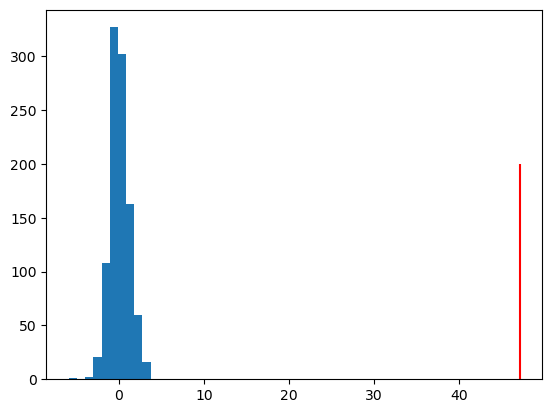

comb. reliable mean: 19.221044300186552
comb. unreliable mean: 13.633478498366673


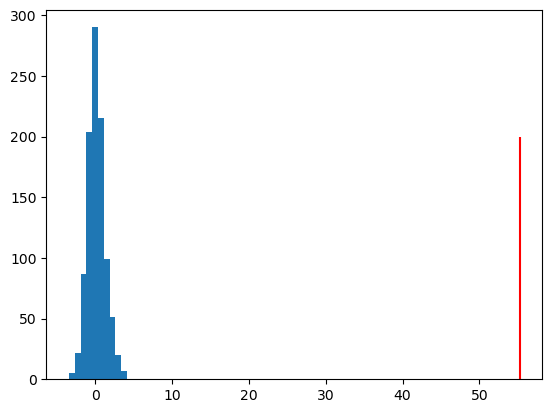

INFg reliable mean: 19.295315877509893
INFg unreliable mean: 14.256189016827365


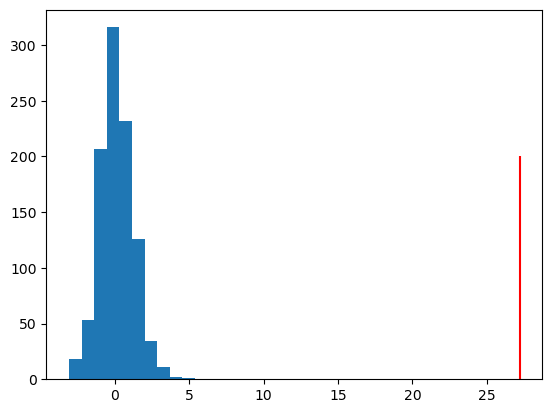

UT reliable mean: 19.148492207567696
UT unreliable mean: nan


/home/paavo/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/paavo/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/paavo/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/paavo/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/paavo/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/paavo/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2480: User

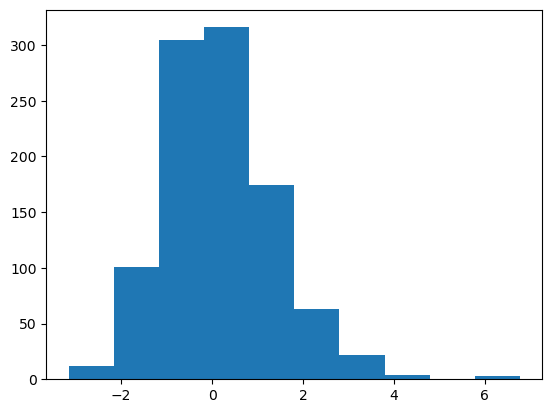

In [390]:
area = data.iloc[2:,8:48]
tags = ['aSYN','comb.','INFg','UT']
unreliable_inds = [aSYNinds,combinds,INFginds,UTinds]
col_inds = [range(0,10),range(10,20),range(20,30),range(30,40)]

for i in range(4):
    tmp=unreliable_inds[i]
    columns=col_inds[i]
    reliable_inds = [i for i in range(area.shape[0]) if i not in tmp]
    rel=area.iloc[:,columns].iloc[reliable_inds,:].to_numpy(dtype=float).flatten()
    unrel=area.iloc[:,columns].iloc[tmp,:].to_numpy(dtype=float).flatten()
    
    print('{} reliable mean: {}'.format(tags[i],np.mean(rel)))
    print('{} unreliable mean: {}'.format(tags[i],np.mean(unrel)))
    
    it=1000
    null = rel.flatten()
    stats = []
    for i in range(it):
        alt = np.random.choice(rel,10, replace=True)
        stat, _ = test_stat(null,alt)
        stats.append(stat)
    mark,_ = test_stat(null, unrel)
    plt.hist(stats)
    plt.vlines([mark],[0],[it/5],colors='red')
    plt.show()

In [169]:
np.concatenate([unrel,null])

(4434,)

In [226]:
np.sum(aSYNbool & combbool)

0

In [227]:
np.sum(aSYNbool & INFgbool)

0

In [342]:
np.sum(aSYNbool & UTbool)

13

In [229]:
np.sum(combbool & INFgbool)

0

In [230]:
np.sum(combbool & UTbool)

1